# **GRU Exercise**

## Import libraries

In [1]:
import pandas as pd
import numpy as np

## load the dataset
### Dataset path : 5- Time series forecasting/2-2- Time Series Forecasting (LSTM and GRU)/ LAB/Dataset/traffic.csv


In [4]:
df = pd.read_csv('/content/traffic (4).csv', usecols=[2])

## Data Exploration



In [5]:
df

,Vehicles
0,15
1,13
2,10
3,7
4,9
...,...
48115,11
48116,30
48117,16
48118,22


## Feature Engineering (if needed)



## Exploratory Data Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
df.head()

,Vehicles
0,15
1,13
2,10
3,7
4,9


In [7]:
df.tail()

,Vehicles
48115,11
48116,30
48117,16
48118,22
48119,12


In [8]:
df.shape

(48120, 1)

In [9]:
df.describe()

,Vehicles
count,48120.000000
mean,22.791334
std,20.750063
min,1.000000
25%,9.000000
50%,15.000000
75%,29.000000
max,180.000000


In [10]:
df.isna().sum()

Vehicles    0
dtype: int64

In [33]:
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers, lower_bound, upper_bound


outliers, lower_bound, upper_bound = detect_outliers_iqr(df, 'Vehicles')
print("Outliers detected using IQR method:")
print(outliers)

df_cleaned = df[(df['Vehicles'] >= lower_bound) & (df['Vehicles'] <= upper_bound)]
print("\nDataFrame after removing outliers:")
print(df_cleaned)

Outliers detected using IQR method:
       Vehicles
2603         70
2890         64
2891         62
4234         62
4235         61
...         ...
43362       112
43363        69
43574       162
43575        83
43576        60

[3617 rows x 1 columns]

DataFrame after removing outliers:
       Vehicles
0            15
1            13
2            10
3             7
4             9
...         ...
48115        11
48116        30
48117        16
48118        22
48119        12

[44503 rows x 1 columns]


In [35]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_cleaned)

In [40]:
def create_sequences(df_cleaned, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(df_cleaned)):
        X.append(df_cleaned[i-seq_length:i, 0])
        y.append(df_cleaned[i, 0])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(scaled_data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

## split into train and test sets

In [41]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

## Model Building



In [42]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

model = Sequential([
    GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),  # حي ار يو احط اثنين لاير واحط 50 عدد كبير
    GRU(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


## Fitting The Model



In [43]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1112/1112 [==============================] - 16s 10ms/step - loss: 0.0061 - val_loss: 0.0045
Epoch 2/10
1112/1112 [==============================] - 11s 10ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 3/10
1112/1112 [==============================] - 10s 9ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 4/10
1112/1112 [==============================] - 10s 9ms/step - loss: 0.0038 - val_loss: 0.0037
Epoch 5/10
1112/1112 [==============================] - 11s 10ms/step - loss: 0.0037 - val_loss: 0.0036
Epoch 6/10
1112/1112 [==============================] - 11s 10ms/step - loss: 0.0035 - val_loss: 0.0038
Epoch 7/10
1112/1112 [==============================] - 11s 10ms/step - loss: 0.0035 - val_loss: 0.0037
Epoch 8/10
1112/1112 [==============================] - 10s 9ms/step - loss: 0.0035 - val_loss: 0.0036
Epoch 9/10
1112/1112 [==============================] - 10s 9ms/step - loss: 0.0034 - val_loss: 0.0036
Epoch 10/10
1112/1112 [==============================] - 11s 10ms/st

## Make preductuion and evaluatuin matrix.

In [46]:
predicted_Vehicles = model.predict(X_test)

278/278 [==============================] - 1s 4ms/step


In [47]:
predicted_Vehicles = scaler.inverse_transform(predicted_Vehicles.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

## Visualize the result

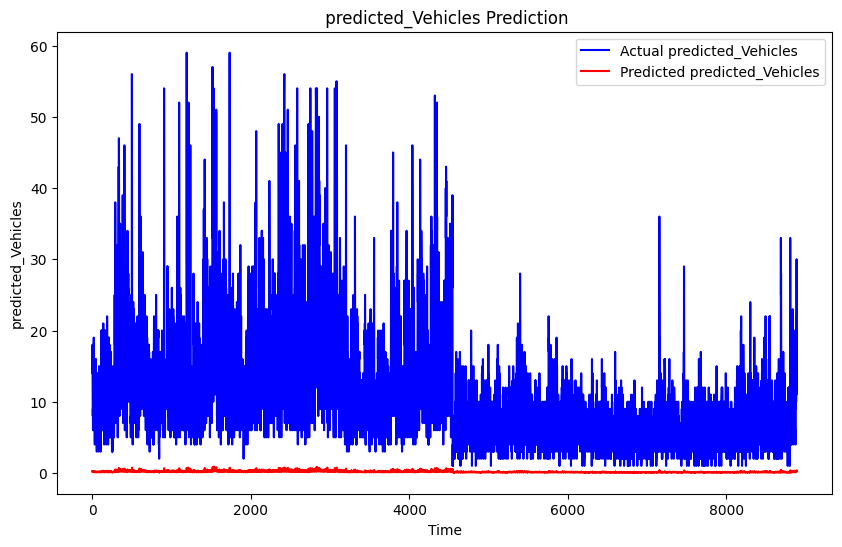

In [49]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, color='blue', label='Actual predicted_Vehicles')
plt.plot(predicted_stock_price, color='red', label='Predicted predicted_Vehicles')
plt.title(f' predicted_Vehicles Prediction')
plt.xlabel('Time')
plt.ylabel('predicted_Vehicles')
plt.legend()
plt.show()

# **Well done** :)